In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
from scipy import stats
from statistics import *

In [2]:
# Lendo base
data = pd.read_excel('data_Pado.xlsx', sheet_name = 'Exportar Planilha')
data = data.drop('Unnamed: 0', 1)

In [3]:
#Exibindo dados
data

,CODIGO,ESTAB,LIMITE_CREDITO,DISPONIVEL,% DISPONIVEL,DT_VALIDADE,CLIENTE_DESTE,CIDADE,UF,CEP,...,NRO_TIT_VCDOS,PRIM_VENCIDO,ULT_VENCIDO,MED_ARIT_TIT_VCDO,MED_ATRASO_PGTO,PEDIDOS_LIB_12_MESES,FATURAMENTO_12_MESES,DESABONADORA,FAKE_CNPJ,FAKE_RAZAO_SOCIAL
0,11214,1,3500.0,773.98,0.221137,15/12/2020,14/11/2008,BRAGANCA PAULISTA,SP,12,...,0,NaN,NaN,0.0,0.000000,3.0,23010.90,NaN,62.904.706/0001-35,"Mike WhiteSanchez, Griffin and Mason"
1,17745,1,4100.0,4100.00,1.000000,25/06/2020,14/11/2008,TUPA,SP,17,...,0,NaN,NaN,0.0,0.000000,1.0,2744.45,NaN,09.120.707/0001-06,Ashley DavisCowan-Greene
2,22128,1,6250.0,6250.00,1.000000,10/10/2020,14/11/2008,INDAIATUBA,SP,13,...,0,NaN,NaN,0.0,4.250000,1.0,1989.10,NaN,36.684.802/0001-05,"Kimberly HernandezFlores, Mcbride and Barajas"
3,10385,1,19200.0,19200.00,1.000000,25/12/2020,14/11/2008,BRASILIA,DF,72,...,0,NaN,NaN,0.0,0.000000,2.0,10744.39,NaN,93.854.794/0001-31,"Dylan EvansColeman, Reid and Logan"
4,10385,2,19200.0,19200.00,1.000000,25/12/2020,14/11/2008,BRASILIA,DF,71,...,0,NaN,NaN,0.0,0.000000,3.0,10184.95,NaN,98.441.017/0001-89,"Jill SchneiderHopkins, Beltran and Mckee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,20778,1,13200.0,11200.00,0.848485,28/10/2020,14/11/2008,BRUMADO,BA,46,...,1,17/08/2020,17/08/2020,3.0,0.000000,3.0,6752.85,NaN,89.173.183/0001-50,Jonathan TurnerBrooks Group
3849,16907,1,25200.0,25200.00,1.000000,15/12/2019,14/11/2008,LUCAS DO RIO VERDE,MT,78,...,0,NaN,NaN,0.0,0.000000,NaN,2205.60,NaN,47.772.699/0001-71,Courtney KennedyHopkins Group
3850,10661,5,35200.0,-6150.80,-0.174739,10/10/2020,26/10/2016,DOIS IRMÃOS,RS,93,...,0,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,"Misty OrtegaLee, Conner and Parker"
3851,19295,16,35600.0,-15439.94,-0.433706,05/09/2020,10/07/2018,BELO HORIZONTE,MG,30,...,0,NaN,NaN,0.0,24.761905,NaN,NaN,NaN,NaN,Lindsey SmithMarquez Group


O que não ficou claro:
* O significado da coluna ESTAB (não consta no arquivo dicionário)
* Média de títulos vencidos é em dias? (info consta no dicionário)

In [4]:
# Exibindo algumas informações - quantidade de nulos por coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CODIGO                3853 non-null   int64  
 1   ESTAB                 3853 non-null   int64  
 2   LIMITE_CREDITO        3853 non-null   float64
 3   DISPONIVEL            3853 non-null   float64
 4   % DISPONIVEL          3811 non-null   float64
 5   DT_VALIDADE           3785 non-null   object 
 6   CLIENTE_DESTE         3853 non-null   object 
 7   CIDADE                3853 non-null   object 
 8   UF                    3853 non-null   object 
 9   CEP                   3853 non-null   int64  
 10  ULTIMA_NOTA           3853 non-null   object 
 11  VALOR_ULTIMA_NOTA     3853 non-null   float64
 12  VALOR_A_VENCER        3853 non-null   float64
 13  PZO_MEDIO_DIAS        3853 non-null   float64
 14  VCDOS_NAO_PAGOS       3853 non-null   float64
 15  NRO_TIT_VCDOS        

In [5]:
data.isnull().sum()

CODIGO                     0
ESTAB                      0
LIMITE_CREDITO             0
DISPONIVEL                 0
% DISPONIVEL              42
DT_VALIDADE               68
CLIENTE_DESTE              0
CIDADE                     0
UF                         0
CEP                        0
ULTIMA_NOTA                0
VALOR_ULTIMA_NOTA          0
VALOR_A_VENCER             0
PZO_MEDIO_DIAS             0
VCDOS_NAO_PAGOS            0
NRO_TIT_VCDOS              0
PRIM_VENCIDO            3799
ULT_VENCIDO             3799
MED_ARIT_TIT_VCDO          0
MED_ATRASO_PGTO            0
PEDIDOS_LIB_12_MESES     224
FATURAMENTO_12_MESES      77
DESABONADORA            3676
FAKE_CNPJ                  3
FAKE_RAZAO_SOCIAL          0
dtype: int64

Colunas que possuem células em branco:
* % DISPONIVEL
* DT_VALIDADE
* PRIM_VENCIDO
* ULT_VENCIDO
* PEDIDOS_LIB_12_MESES
* FATURAMENTO_12_MESES
* DESABONADORA
* FAKE_CNPJ

Para a coluna % DISPONIVEL a estratégia usada será substituir valores nulos por zero, pois observando os dados o limite disponível nesses casos foi zero ou negativo, sendo assim a % do limite disponível também deve ser zero. O código abaixo implementa essa mudança:

In [6]:
data.update(data['% DISPONIVEL'].fillna(0))
# Note que a quantidade de valores nulos para a coluna % DISPONIVEL mudou para 0
data.isnull().sum()

CODIGO                     0
ESTAB                      0
LIMITE_CREDITO             0
DISPONIVEL                 0
% DISPONIVEL               0
DT_VALIDADE               68
CLIENTE_DESTE              0
CIDADE                     0
UF                         0
CEP                        0
ULTIMA_NOTA                0
VALOR_ULTIMA_NOTA          0
VALOR_A_VENCER             0
PZO_MEDIO_DIAS             0
VCDOS_NAO_PAGOS            0
NRO_TIT_VCDOS              0
PRIM_VENCIDO            3799
ULT_VENCIDO             3799
MED_ARIT_TIT_VCDO          0
MED_ATRASO_PGTO            0
PEDIDOS_LIB_12_MESES     224
FATURAMENTO_12_MESES      77
DESABONADORA            3676
FAKE_CNPJ                  3
FAKE_RAZAO_SOCIAL          0
dtype: int64

Para as colunas DT_VALIDADE, PEDIDOS_LIB_12_MESES e FATURAMENTO_12_MESES a estratégia usada será excluir linhas com valores em branco, pois não representa uma grande perda para o banco de dados. O código abaixo implementa essa mudança:

In [7]:
data = data.dropna(subset = ['DT_VALIDADE', 'PEDIDOS_LIB_12_MESES', 'FATURAMENTO_12_MESES'])
# Note agora que a quantidade de nulos mudou para 0 para as colunas DT_VALIDADE, PEDIDOS_LIB_12_MESES e FATURAMENTO_12_MESES
data.isnull().sum()

CODIGO                     0
ESTAB                      0
LIMITE_CREDITO             0
DISPONIVEL                 0
% DISPONIVEL               0
DT_VALIDADE                0
CLIENTE_DESTE              0
CIDADE                     0
UF                         0
CEP                        0
ULTIMA_NOTA                0
VALOR_ULTIMA_NOTA          0
VALOR_A_VENCER             0
PZO_MEDIO_DIAS             0
VCDOS_NAO_PAGOS            0
NRO_TIT_VCDOS              0
PRIM_VENCIDO            3545
ULT_VENCIDO             3545
MED_ARIT_TIT_VCDO          0
MED_ATRASO_PGTO            0
PEDIDOS_LIB_12_MESES       0
FATURAMENTO_12_MESES       0
DESABONADORA            3491
FAKE_CNPJ                  0
FAKE_RAZAO_SOCIAL          0
dtype: int64

Para as colunas PRIM_VENCIDO, ULT_VENCIDO  e DESABONADORA a estratégia usada será excluir as colunas por inteiro, pois representam uma perda muito pequena de informações em comparação ao tamanho da base, dado que encontram-se vazias para a maioria das linhas. O código abaixo implementa essa mudança:

In [8]:
data = data.drop(columns=['PRIM_VENCIDO', 'ULT_VENCIDO', 'DESABONADORA'])
# Exibindo quantidade de nulos por coluna (todas sem nulos)
data.isnull().sum()

CODIGO                  0
ESTAB                   0
LIMITE_CREDITO          0
DISPONIVEL              0
% DISPONIVEL            0
DT_VALIDADE             0
CLIENTE_DESTE           0
CIDADE                  0
UF                      0
CEP                     0
ULTIMA_NOTA             0
VALOR_ULTIMA_NOTA       0
VALOR_A_VENCER          0
PZO_MEDIO_DIAS          0
VCDOS_NAO_PAGOS         0
NRO_TIT_VCDOS           0
MED_ARIT_TIT_VCDO       0
MED_ATRASO_PGTO         0
PEDIDOS_LIB_12_MESES    0
FATURAMENTO_12_MESES    0
FAKE_CNPJ               0
FAKE_RAZAO_SOCIAL       0
dtype: int64

<AxesSubplot:title={'center':'Histograma da % disponível de crédito'}, ylabel='Frequency'>

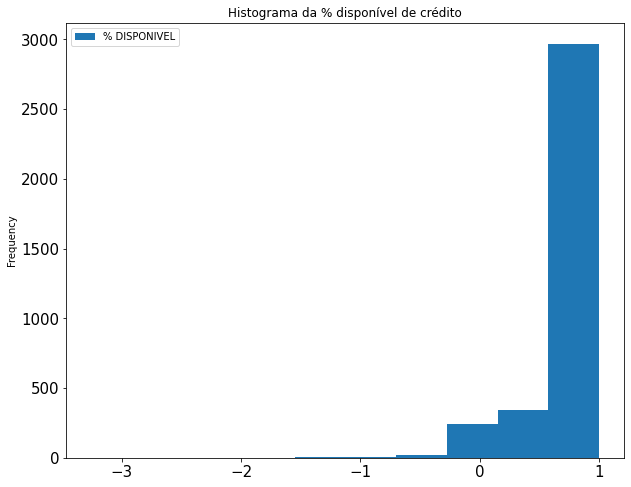

In [25]:
# Exploração Gráficos
data['% DISPONIVEL'].plot(kind='hist', title='Histograma da % disponível de crédito', figsize=(10,8), legend=True, fontsize=15)

<AxesSubplot:title={'center':'Prazo médio de vencimentos nos últimos 12 meses'}>

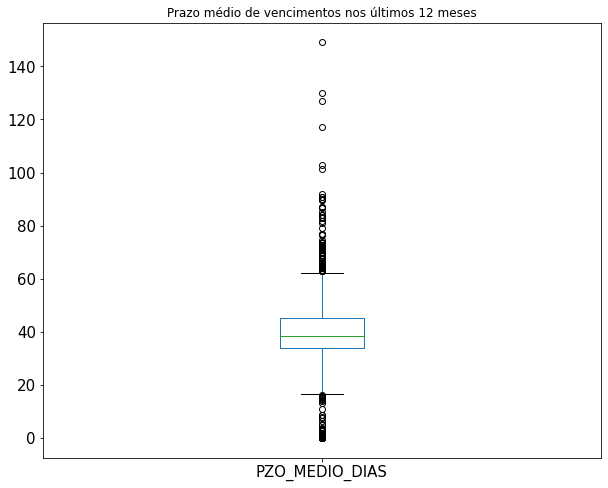

In [31]:
data['PZO_MEDIO_DIAS'].plot(kind='box', title='Prazo médio de vencimentos nos últimos 12 meses', figsize=(10,8), legend=True, fontsize=15)

<AxesSubplot:xlabel='VALOR_ULTIMA_NOTA', ylabel='LIMITE_CREDITO'>

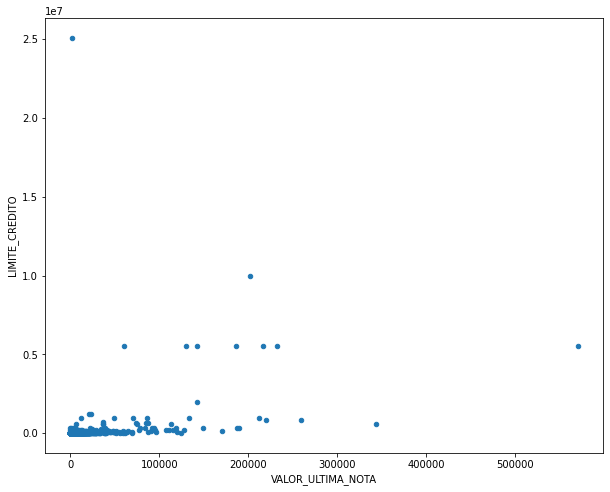

In [34]:
data.plot(x='VALOR_ULTIMA_NOTA', y='LIMITE_CREDITO', kind='scatter', figsize=(10,8))